In [121]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import astropy.units as u

In [97]:
def rho_model(r, rho_0, rs):
    ratio = r/rs
    temp = ratio*(1+ratio)**2
    return rho_0/temp

In [83]:
rho_model = lambda r, rho_0, rs: rho_0/((r/rs)*(1+(r/rs))**2)

In [118]:
d = np.genfromtxt(const.REF_DIR+"urs3_11stars.dat")

(array([  10.,   22.,  277., 1054., 1290., 1269.,  925., 1021.,  871.,
         196.]),
 array([-3.30103 , -2.740824, -2.180618, -1.620412, -1.060206, -0.5     ,
         0.060206,  0.620412,  1.180618,  1.740824,  2.30103 ]),
 <BarContainer object of 10 artists>)

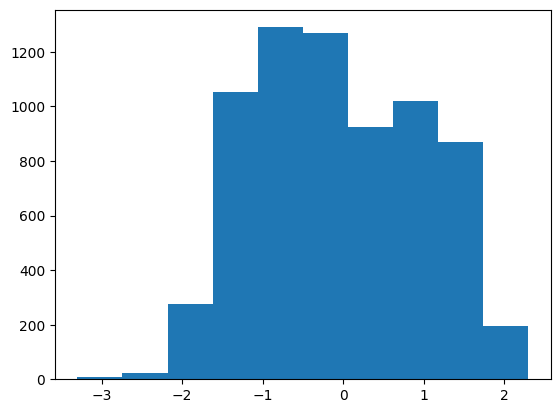

In [141]:
plt.hist(np.log10(d[:,0])-9)

In [128]:
d[0]/1e9

array([3.e+01, 1.e-11])

In [126]:
(d[0][0]*u.M_sun/u.kpc**3).to(u.M_sun/u.pc**3)

<Quantity 30. solMass / pc3>

In [119]:
d[0]*u

array([3.e+10, 1.e-02])

In [99]:
median = np.array([[0.00010259048816603226, 2754265585248.659],
[0.00019777410947083665, 1421871590825.6484],
[0.000358757057571388, 830083090285.6111],
[0.0006273262762044867, 460197461440.4219],
[0.0014142458540296558, 197224964710.9345],
[0.003007283404402999, 88490774960.02226],
[0.005865234481665193, 48374252395.134514],
[0.013028134161649262, 19099032212.176468],
[0.02708021396717058, 7615058294.844247],
[0.050264535676569154, 3628128281.252658],
[0.10874143112618423, 1543827053.8212547],
[0.22346794085956426, 639206430.9670739],
[0.4537829129844804, 238328798.9295053],
[1.0089753451902483, 72237699.56335875]])

m16 = np.array([[0.00010111856410763859, 6040077571561.075],
[0.00026237452256146047, 2248784717095.0557],
[0.0006144478790578399, 968172064562.7759],
[0.0014766389725905191, 401533686821.5626],
[0.0036414109477551073, 157580349616.09222],
[0.008840847303165747, 64261895350.74389],
[0.02023570350203774, 26565471716.179737],
[0.07098682921691599, 6491157647.591015],
[0.17853616555805923, 2277175738.093953],
[0.40359480119767666, 899170616.435771],
[1.0081936911728175, 303255670.0430071]])

m84 = np.array([[0.00010184954561129321, 1199237724856.9653],
[0.0002629133293890159, 452356526322.617],
[0.0006370675069506061, 191905915717.31573],
[0.0023453723295285937, 49344726392.027916],
[0.008584280493262788, 13422044177.77277],
[0.020242162111316086, 4862940633.185111],
[0.0477929966908201, 1680470158.315401],
[0.09417377974181533, 532959630.0226418],
[0.19476997511979238, 111851901.59587409],
[0.3881307381816182, 22252483.009564962],
[0.7302770424774847, 3704810.966157737],
[1.0044776479296322, 1709489.6257959695]])


In [169]:
np.shape(jpro)

(1000, 500)

In [225]:
JProfile.classicNFW("UMa_II", 0)

(<Row index=0>
         rhos                 rs                 rt        
       float64             float64            float64      
 -------------------- ------------------ ------------------
 0.015501999999999998 1868.4999999999998 27629.509499999996,
 <function DarkMatter.JProfile.profile.classicNFW.<locals>.<lambda>(x, b, props)>)

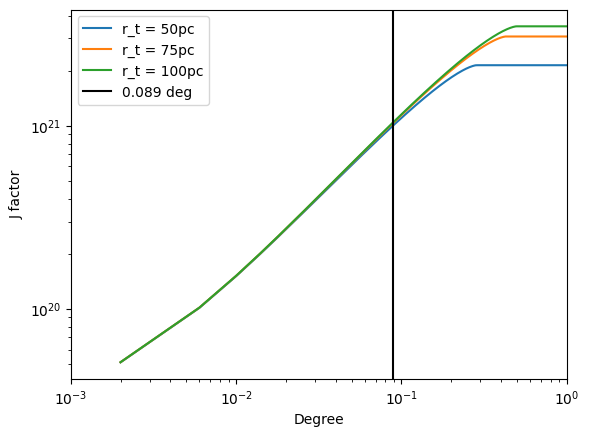

In [229]:
jp = JProfile.calcJval("UMa_III", seed=-100, r_t=50)
plt.plot(jp[:,0], jp[:,1], label="r_t = 50pc")
jp = JProfile.calcJval("UMa_III", seed=-100, r_t=75)
plt.plot(jp[:,0], jp[:,1], label="r_t = 75pc")
jp = JProfile.calcJval("UMa_III", seed=-100, r_t=100)
plt.plot(jp[:,0], jp[:,1], label="r_t = 100pc")
plt.axvline(0.089, color="k", label="0.089 deg")
plt.xlim(1e-3, 1)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Degree")
plt.ylabel("J factor")
plt.legend()

In [243]:
PSF = ResponseFunction.EventDisplay.readIRFs("UMa_III", ext=True).PSF

In [267]:
def compareUCandC(gJprof, PSF):
    th = gJProf[:,0]
    dth = np.diff(gJProf[:,0])[0]
    th_rad = th * TMath.DegToRad()
    dth_rad = dth * TMath.DegToRad()
    
    J, J2D = JProfile.calcHKConvJProf2D(gJProf, PSF, en=1000, ext=True)
    
    UCJ = np.cumsum(gJProf[:,1]*2*np.pi*np.sin(th_rad)*dth_rad)
    CJ = np.cumsum(J2D[:,1]*2*np.pi*np.sin(th_rad)*dth_rad)
    return th, UCJ, CJ

UC_results = []
C_results = []
for i in trange(1000):
    gJProf = JProfile.calcJProfile("UMa_III")
    J, J2D = JProfile.calcHKConvJProf2D(gJProf, PSF, en=1000, ext=True)
    theta, UC, C = compareUCandC(gJProf, PSF)
    UC_results.append(UC)
    C_results.append(C)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [279]:
UC = np.array([np.percentile(value, [50, 16, 84]) for value in np.array(UC_results).T])

C = np.array([np.percentile(value, [50, 16, 84]) for value in np.array(C_results).T])


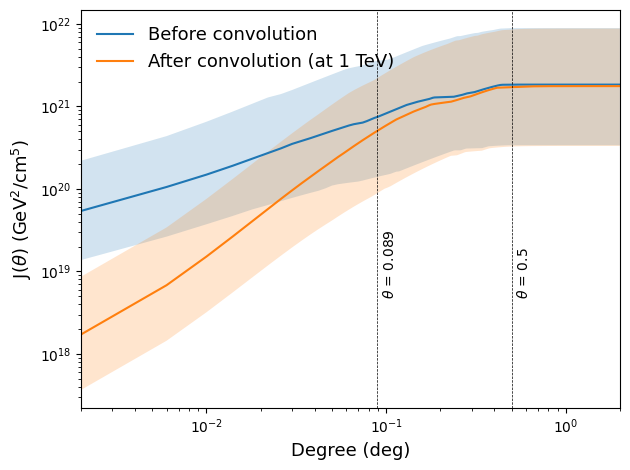

In [362]:
plt.plot(theta, UC[:,0], label="Before convolution")
plt.fill_between(theta, UC[:,1], UC[:,2], alpha=0.2)

plt.plot(theta, C[:,0], label="After convolution (at 1 TeV)")
plt.fill_between(theta, C[:,1], C[:,2], alpha=0.2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (deg)", fontsize=13)
plt.ylabel(r"J($\theta$) (GeV$^2$/cm$^5$)", fontsize=13)
plt.legend(fontsize=13, loc=2, frameon=False)

plt.axvline(0.089, color="k", ls="--", lw=0.5)
plt.axvline(0.5, color="k", ls="--", lw=0.5)
plt.text(0.095, 5e18, r"$\theta$ = 0.089", rotation=90)
plt.text(0.53, 5e18, r"$\theta$ = 0.5", rotation=90)
plt.xlim(0.002, 2)
plt.tight_layout()

plt.savefig("Jprofile.pdf")

Text(0, 0.5, 'J factor')

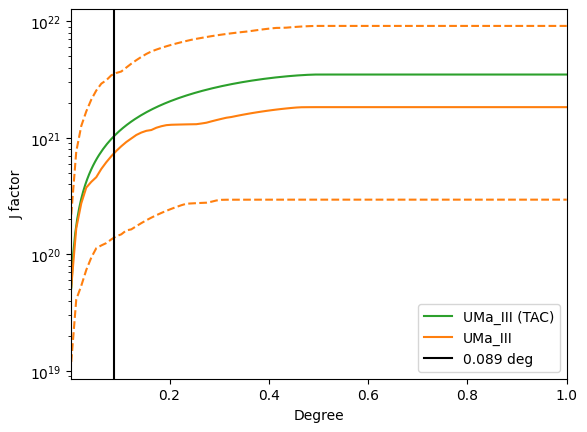

In [238]:

# jpro = JProfile.calcJval("Segue_1")
# plt.plot(jpro[:,0], jpro[:,1], label="Segue_1")

# jpro = JProfile.calcJval("UMa_III", seed=-100)
# plt.plot(jpro[:,0], jpro[:,1], label="UMa_III (TAC)", color="C2")

jpro_arr = [JProfile.calcJval("UMa_III", deg=np.linspace(2e-3, 1, 100)) for i in range(3000)]
tiles = np.array([np.percentile(np.asarray(jpro_arr)[:,i], [50, 16, 84]) for i in range(100)])
plt.plot(np.linspace(2e-3, 1, 100), tiles[:,0], color="C1", label="UMa_III")
plt.plot(np.linspace(2e-3, 1, 100), tiles[:,1], color="C1", ls="--")
plt.plot(np.linspace(2e-3, 1, 100), tiles[:,2], color="C1", ls="--")
plt.axvline(0.089, color="k",label="0.089 deg")
plt.yscale("log")
plt.legend()
plt.xlim(1e-3, 1)
plt.xlabel("Degree")
plt.ylabel("J factor")

#plt.xscale("log")

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_13203/956587067.py:20: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(r / 10) * TMath.RadToDeg()


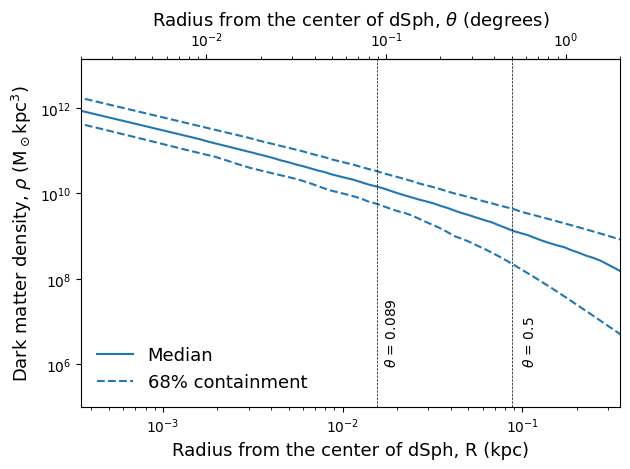

In [491]:
rho_array = np.array([[rho_model(r, d[:,0][i], d[:,1][i])] for i in range(len(d))])
rho_perc = np.array([np.percentile(rho_array.T[i], [16, 50, 84]) for i in range(100)])
plt.plot(r, rho_perc[:,0], ls="--", color="C0")
plt.plot(r, rho_perc[:,1], color="C0", label="Median")
plt.plot(r, rho_perc[:,2], ls="--", color="C0", label="68% containment")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radius from the center of dSph, R (kpc)", fontsize=13)
plt.ylabel(r"Dark matter density, $\rho$ (M$_\odot$kpc$^3$)", fontsize=13)

plt.axvline(10 * np.sin(np.radians(0.5)), color="k", ls="--", lw=0.5)
plt.axvline(10 * np.sin(np.radians(0.089)), color="k", ls="--", lw=0.5)
plt.text(0.017, 1e6, r"$\theta$ = 0.089", rotation=90)
plt.text(0.1, 1e6, r"$\theta$ = 0.5", rotation=90)

ax = plt.gca()
# Add top ticks in degrees
def r_to_deg(r):
    return np.arcsin(r / 10) * TMath.RadToDeg()

# Create secondary y-axis for degrees
secax = ax.secondary_xaxis('top', functions=(r_to_deg, lambda deg: 10000 * np.sin(np.radians(deg))))
secax.set_xlabel(r"Radius from the center of dSph, $\theta$ (degrees)", fontsize=13)

plt.legend(fontsize=13, frameon=False)
plt.tight_layout()
plt.xlim(10 * np.sin(np.radians(0.002)), 10 * np.sin(np.radians(2)))
plt.savefig("densityProfile.pdf")
plt.show()

In [364]:
d = np.genfromtxt(const.REF_DIR+"urs3_11stars.dat")

In [398]:
d[:,1][d[:,0]==3.e08]

array([0.5 , 0.9 , 1.  , 2.  , 0.8 , 0.9 , 0.5 , 0.9 , 1.  , 2.  , 2.  ,
       1.  , 1.  , 0.7 , 1.  , 0.9 , 0.4 , 5.  , 2.  , 1.  , 1.  , 4.  ,
       1.  , 1.  , 2.  , 0.8 , 1.  , 0.6 , 1.  , 1.  , 0.9 , 3.  , 0.6 ,
       3.  , 1.  , 3.  , 0.6 , 0.4 , 0.7 , 0.7 , 0.7 , 0.5 , 1.  , 2.  ,
       2.  , 0.7 , 3.  , 2.  , 1.  , 4.  , 4.  , 2.  , 0.4 , 0.4 , 0.4 ,
       0.4 , 0.4 , 0.8 , 2.  , 4.  , 3.  , 2.  , 0.6 , 0.2 , 0.4 , 5.  ,
       4.  , 1.  , 1.  , 1.  , 1.  , 2.  , 0.9 , 4.  , 0.3 , 2.  , 1.  ,
       0.7 , 0.2 , 0.5 , 0.6 , 1.  , 0.8 , 0.3 , 0.8 , 0.7 , 0.7 , 0.7 ,
       0.7 , 1.  , 1.  , 2.  , 2.  , 0.8 , 0.8 , 0.9 , 0.3 , 2.  , 0.05,
       0.05, 0.05, 0.05, 3.  , 0.8 , 1.  , 0.4 , 1.  , 1.  , 1.  , 0.9 ,
       0.4 , 0.1 , 0.8 , 1.  , 1.  , 1.  , 0.6 , 0.7 , 0.3 , 3.  , 3.  ,
       3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 1.  , 1.  ,
       1.  , 1.  , 4.  , 4.  , 0.4 , 0.5 , 0.6 , 2.  , 2.  , 0.3 , 0.3 ,
       0.4 , 0.3 , 0.6 , 0.9 , 2.  , 0.3 , 3.  , 0.

(array([106., 141.,  23.,   5.,   6.,   1.,   2.,   0.,   1.,   9.]),
 array([0.01 , 0.019, 0.028, 0.037, 0.046, 0.055, 0.064, 0.073, 0.082,
        0.091, 0.1  ]),
 <BarContainer object of 10 artists>)

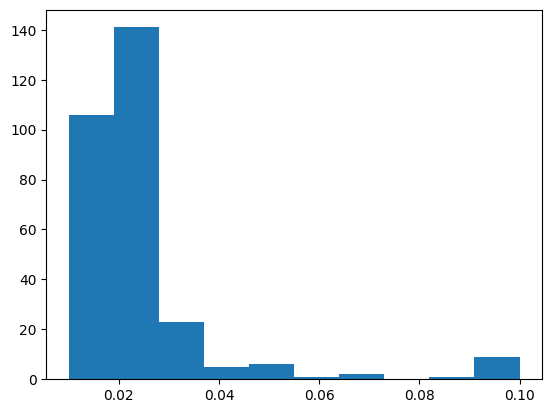

In [434]:
plt.hist(d[:,1][d[:,0]==3.e+10])

In [428]:
10**np.percentile(np.log10(d[:,0]), [16, 50, 84])

array([7.e+07, 9.e+08, 1.e+10])

(array([ 10.,   0.,   0.,   2.,   1.,  19.,  66.,   0., 211., 150., 335.,
        569., 488., 489., 313., 213., 426., 630.,   0., 445., 480., 359.,
        337., 325., 374., 294., 203.,  85.,  97.,  14.]),
 array([ 5.69897   ,  5.88570534,  6.07244067,  6.259176  ,  6.44591134,
         6.63264667,  6.819382  ,  7.00611734,  7.19285267,  7.379588  ,
         7.56632333,  7.75305867,  7.939794  ,  8.12652933,  8.31326467,
         8.5       ,  8.68673533,  8.87347067,  9.060206  ,  9.24694133,
         9.43367667,  9.620412  ,  9.80714733,  9.99388266, 10.180618  ,
        10.36735333, 10.55408866, 10.740824  , 10.92755933, 11.11429466,
        11.30103   ]),
 <BarContainer object of 30 artists>)

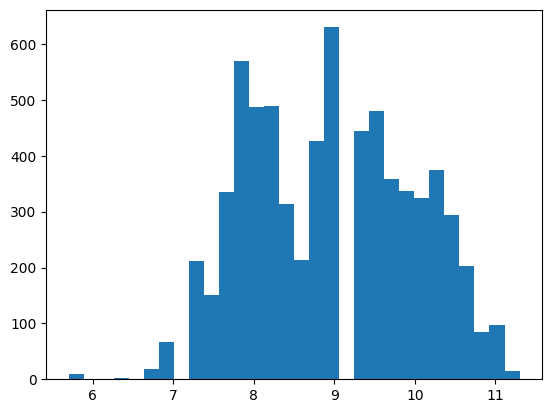

In [429]:
plt.hist(np.log10(d[:,0]), bins=30)

In [402]:

# Generate a sample 2D dataset
np.random.seed(42)
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=1, scale=1.5, size=1000)

# Combine data into a 2D array
data = np.vstack([x, y])


In [414]:
min(y)

-2.0

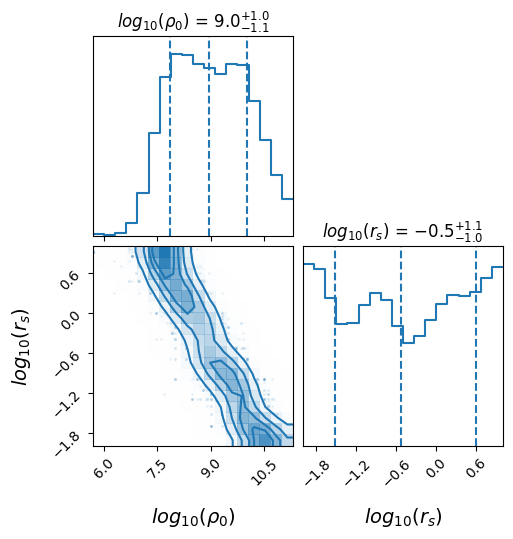

In [481]:
import numpy as np
import matplotlib.pyplot as plt
import corner

# Generate a 2D dataset
np.random.seed(42)
x = np.log10(d[:,0])
y = np.log10(d[:,1])
data = np.vstack([x, y])

# Create a corner plot
figure = corner.corner(
    data.T,
    bins=18,
    labels=[r"$log_{10}(\rho_0)$", r"$log_{10}(r_s)$"],  # Axis labels
    show_titles=True,        # Show titles with statistics
    title_fmt=".1f",         # Format for the statistics
    quantiles=[0.16, 0.5, 0.84],  # Add quantiles
    hist_kwargs={"color": "C0"},  # Customizations for histograms
    color="C0",           # Color for scatter plots
    smooth=True,
    smooth1d=True,
    label_kwargs={"fontsize": 14},  # Increase label font size
    title_kwargs={"fontsize": 12},  # Increase title font size

)

# Show the plot
plt.savefig("parameter.pdf")
plt.show()

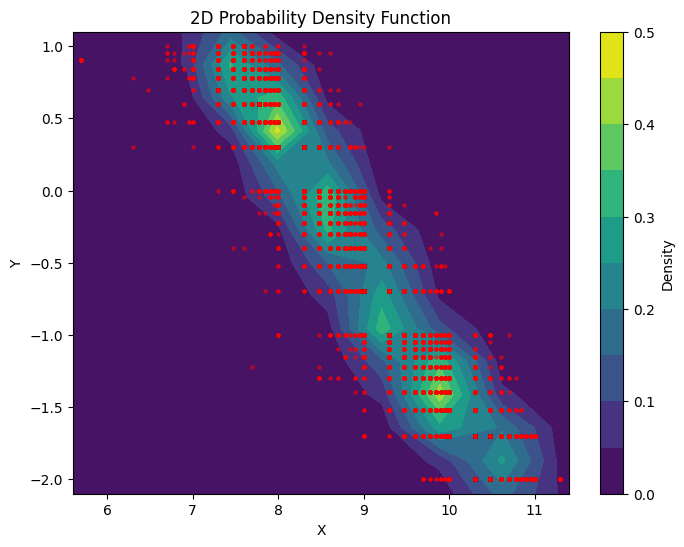

In [424]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Combine data into a 2D array

x = np.log10(d[:,0])
y = np.log10(d[:,1])
data = np.vstack([x, y])
# Perform 2D KDE
kde = gaussian_kde(data)
xmin, xmax = x.min() - 0.1, x.max() + 0.1
ymin, ymax = y.min() - 0.1, y.max() + 0.1

# Create a grid to evaluate the KDE
X, Y = np.meshgrid(np.geomspace(xmin, xmax, 11), np.linspace(ymin, ymax, 15))
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# Plot the density
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=10, cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(x, y, s=5, c='red', alpha=0.5, label='Data points')
plt.title('2D Probability Density Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(array([ 6., 20., 21., 18.,  6., 15., 17., 21., 16., 73.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
        1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
        2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
        3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95]),
 <BarContainer object of 39 artists>)

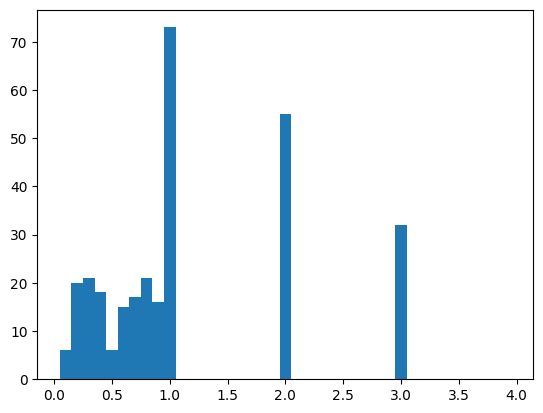

In [396]:
plt.hist(d[:,1][d[:,0]==3.e08], np.arange(0.05, 4, step=0.1))

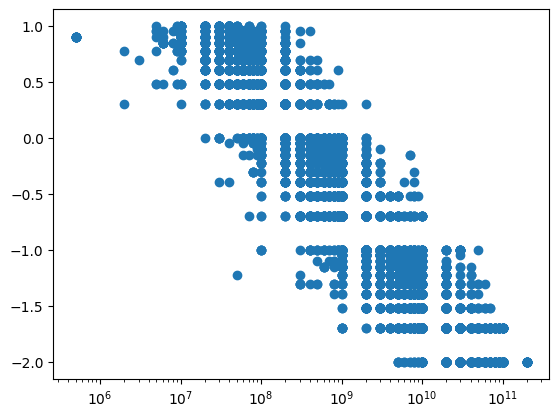

In [379]:
plt.scatter(d[:,0], np.log10(d[:,1]))
plt.xscale("log")


In [19]:
dwarf="UMa_III"
ext = True

## Parse IRFs

In [3]:
runlist = printRunList(dwarf, package="EventDisplay", ext=ext, log_only=True)


for i, run in tqdm(enumerate(runlist), total=len(runlist)):
    ResponseFunction.EventDisplay(dwarf, run, from_log=True,
                                  mode="all", export=True, verbose=False, ext=ext)

  0%|          | 0/27 [00:00<?, ?it/s]

## Parse Events

In [4]:
Likelihood.EventDisplay.initialize(dwarf = dwarf, effCut=0.15, biasCut=0.2, export=False, ext=ext)

Events (dwarf: UMa_III) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_UMa_III_ext.npy.


Warning in <TClass::Init>: no dictionary for class VEvndispRunParameter is available
Warning in <TClass::Init>: no dictionary for class VGlobalRunParameter is available
Warning in <TClass::Init>: no dictionary for class VImageCleaningRunParameter is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorResults is available
Warning in <TClass::Init>: no dictionary for class VTMVAEvaluatorData is available
Warning in <TClass::Init>: no dictionary for class VGammaHadronCuts is available
Warning in <TClass::Init>: no dictionary for class VAnalysisUtilities is available
Warning in <TClass::Init>: no dictionary for class VTimeMask is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameter is available
Warning in <TClass::Init>: no dictionary for class pair<int,VAnaSumRunParameterDataClass> is available
Warning in <TClass::Init>: no dictionary for class VAnaSumRunParameterDataClass is available
Warning in <TClass::Init>: no dictionary for class VA

## Check Event Distribution

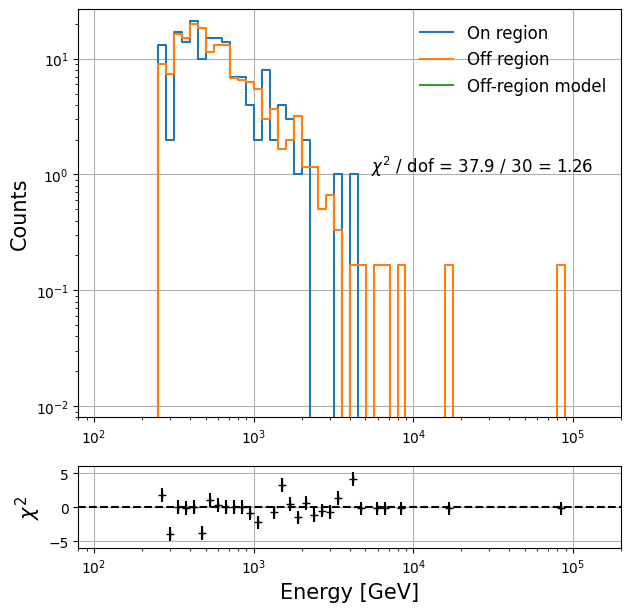

In [5]:
plotData(dwarf, ext=ext)

## Check J profile

log10(J factor) at 0.1 degree is 21.06


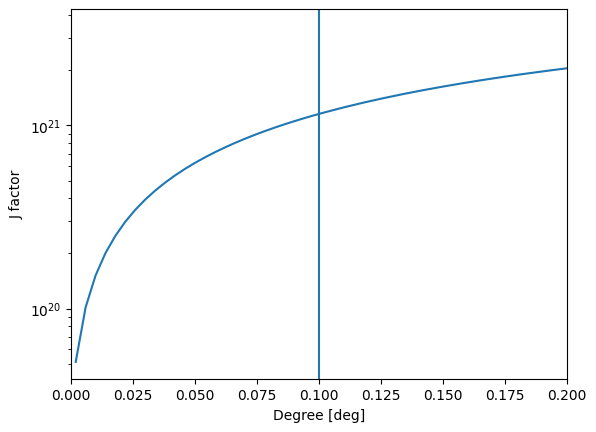

In [6]:
plt.plot(*JProfile.calcJval("UMa_III").T)
plt.xlabel("Degree [deg]")
plt.ylabel("J factor")
plt.yscale("log")
plt.xlim(0, 0.2)
plt.axvline(0.1)
jf = JProfile.calcJval("UMa_III", deg=0.1)
print(f"log10(J factor) at 0.1 degree is {np.log10(jf):.2f}")

## Generate convolved J profile

In [7]:
jprofile_iii = JProfile.generateConvolvedJ("UMa_III", ext=True, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Convolved J factor')

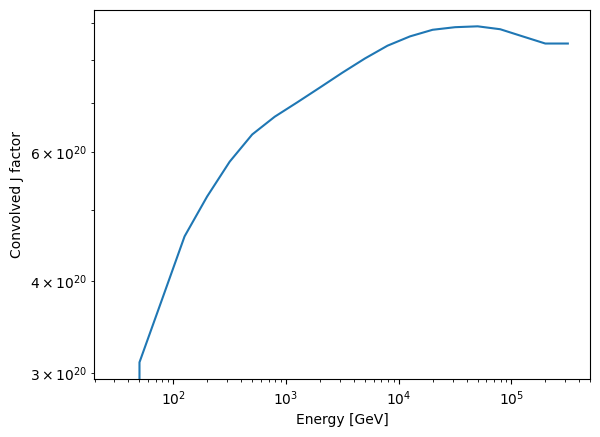

In [8]:
plt.plot(*jprofile_iii[0].T)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy [GeV]")
plt.ylabel("Convolved J factor")

## Compute an expected DM spectrum

In [9]:
channel= "tt"
M = 1000
hg_1d = Likelihood.combinedCalcSignal(dwarf, M, "EventDisplay", channel=channel, ext=ext)

(<cppyy.gbl.TCanvas object at 0x2a32e36d0>,
 <cppyy.gbl.TH1D object at 0x109edfbe0>)

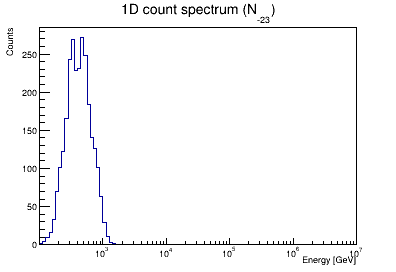

In [10]:
plotRoot(hg_1d, logx=True)

## Compute an upper limit

In [11]:
mle_1d = Likelihood.MLE(dwarf, M, channel=channel, ext=ext, signu=-25) 
mle_1d.minuit(method=2)

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=1000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-25.245) (equivalent to 5.69e-26)
[Log, Result] b = 1000 +/- 41 (null value: 1000)


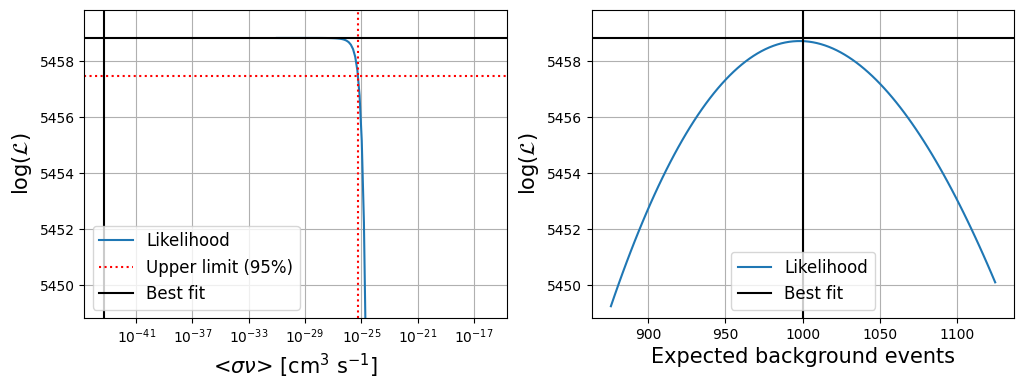

In [12]:
mle_1d.plotProfileLikelihood()

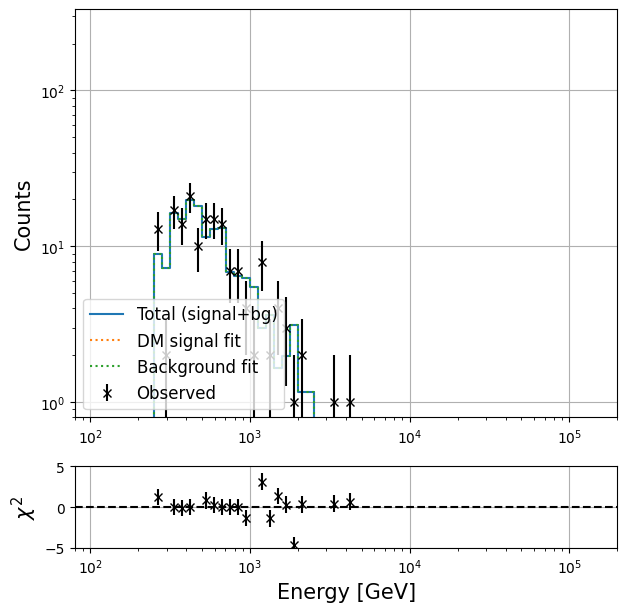

In [13]:
mle_1d.plotSED()

## Compute UL curve

[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_III
[Log] Channel      : tt
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

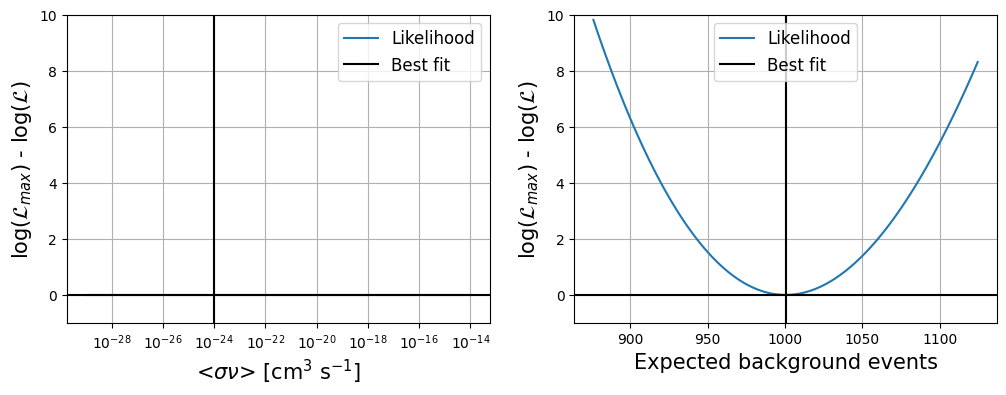

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/test_UMa_III.npy'


In [15]:
filename="test_UMa_III"
OUTPUT = Likelihood.calcUpperLimits(dwarf, channel,  method=2, filename=filename, ext=ext, signu=-25)

(0.1, 100)

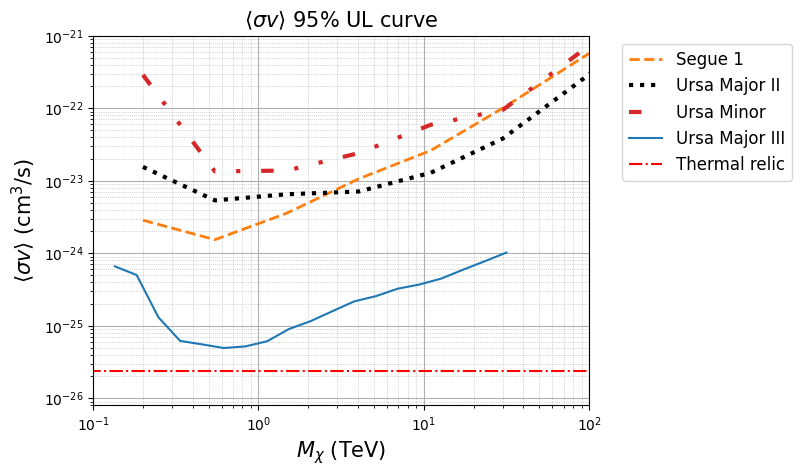

In [24]:

Likelihood.plotULcurve(f"EventDisplay_Segue_1_tt", units="TeV", ls="--", lw=2, label="Segue 1", color="C1", log_label=False, addRelic=False)
Likelihood.plotULcurve(f"EventDisplay_UMa_II_tt", units="TeV", ls=":", lw=3, label="Ursa Major II", color="k", log_label=False, addRelic=False)
Likelihood.plotULcurve(f"EventDisplay_UMi_tt", units="TeV", ls=(0, (3, 5, 1, 5, 1, 5)), lw=3, label="Ursa Minor", color="C3", log_label=False, addRelic=False)
plotULcurve("test_UMa_III",units="TeV", addRelic=True, label="Ursa Major III")
plt.ylim(8e-27, 1e-21)
plt.xlim(0.1, 100)